In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
credit = pd.read_csv('credit_risk_dataset.csv')
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
print('Mode for employee lenght {} '.format(credit['person_emp_length'].mode()[0]))
print('Median for employee lenght {} '.format(credit['person_emp_length'].median()))
print('Mode for loan interest rate {} '.format(credit['loan_int_rate'].mode()[0]))
print('Median for loan interest rate {} '.format(credit['loan_int_rate'].median()))
print('Average for loan interest rate {} '.format(credit['loan_int_rate'].mean()))

Mode for employee lenght 0.0 
Median for employee lenght 4.0 
Mode for loan interest rate 7.51 
Median for loan interest rate 10.99 
Average for loan interest rate 11.01169489224439 


In [8]:
# fill NaN with the mode and median

credit['person_emp_length'].fillna(credit['person_emp_length'].mode()[0], inplace=True)
credit['loan_int_rate'].fillna(credit['loan_int_rate'].median(), inplace=True)

In [9]:
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


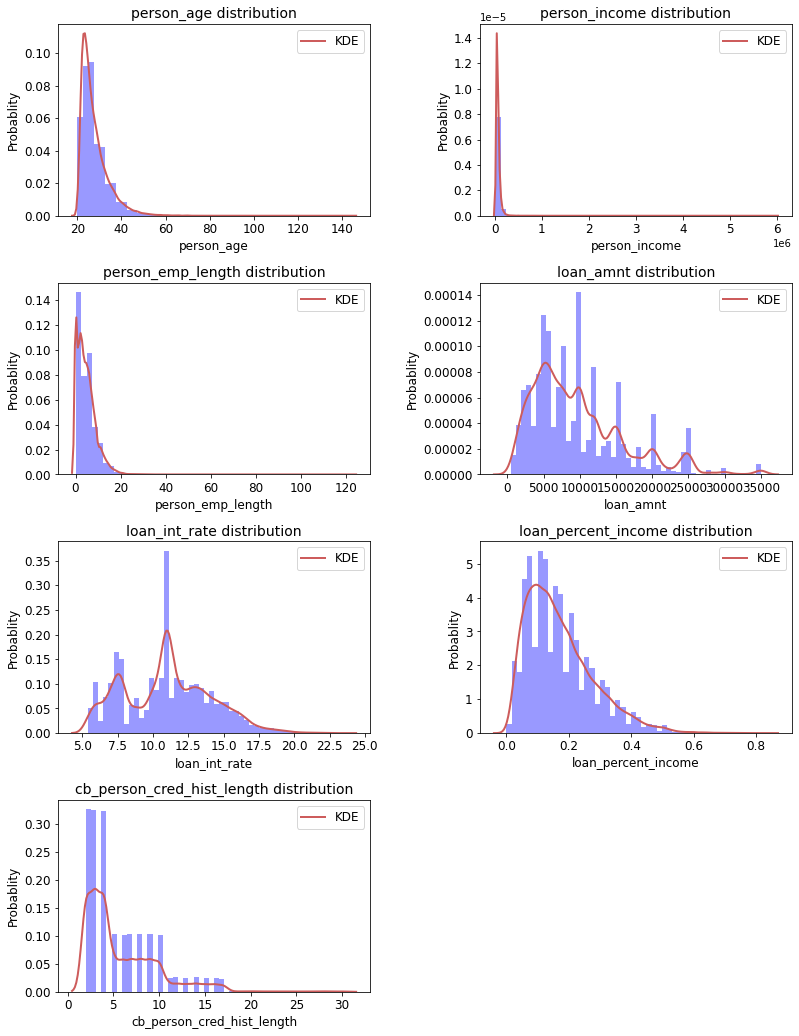

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical = credit.drop(['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status'],axis = 1)

plt.figure(figsize=(12,16))

for i, col in enumerate(numerical.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(numerical[col], color='blue', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

In [11]:
# cleaning outliers

credit_dataset = credit[(credit['person_age'] <= 100) & 
                        (credit['person_emp_length'] <= 60) & 
                        (credit['person_income'] <= 4e6)]

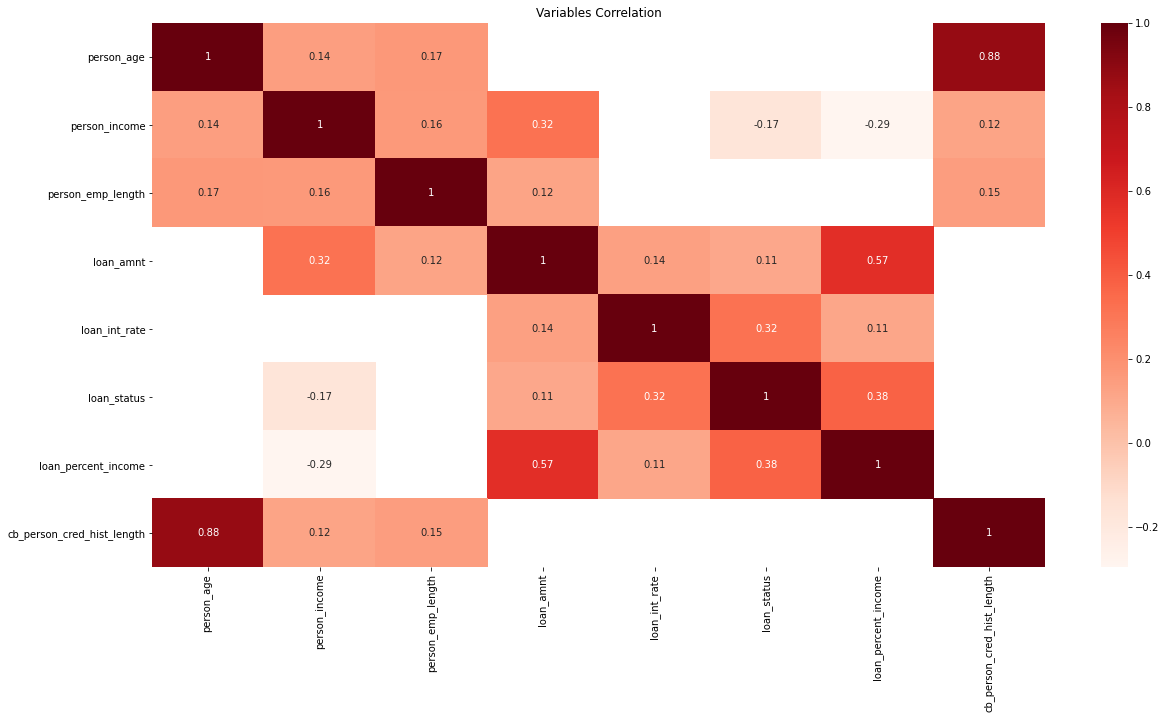

In [12]:
# correlation matrix, to check the correlation of the variables

dfCorr = credit_dataset.corr()
filteredDf = dfCorr[((dfCorr >= .1) | (dfCorr <= -.1))]
plt.figure(figsize=(20,10))
plt.title('Variables Correlation')
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [16]:
credit_dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [17]:
credit_dataset = pd.get_dummies(credit_dataset, columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])

In [21]:
from sklearn.model_selection import train_test_split

predictors = credit_dataset.drop(['loan_status'], axis=1)
target = credit_dataset['loan_status']


X_train, X_test, y_train, y_test = train_test_split(predictors, target, 
                                                    test_size=0.25, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#now we will going to scale the dataset
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)
log_y_pred = lr.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(log_y_pred, y_test)*100)

Accuracy:  86.64047151277013


In [24]:
from sklearn import metrics

print("Results:\n{}".format(metrics.classification_report(y_test, log_y_pred)))

Results:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6368
           1       0.76      0.56      0.65      1776

    accuracy                           0.87      8144
   macro avg       0.83      0.76      0.78      8144
weighted avg       0.86      0.87      0.86      8144



In [70]:
#KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

K_model = KNeighborsClassifier(n_neighbors=6)
K_model.fit(X_train_scaled, y_train)
y_predict = K_model.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_predict, y_test)*100)

Accuracy:  89.9926326129666


In [73]:
#HYPERPARAMETER TUNING
#Grid search for KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 11, 15, 18],
              'p': [1, 2]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10,
                          return_train_score=True, n_jobs=-1, verbose=40)

grid_search.fit(X_train_scaled, y_train)

knear_hyper_score = grid_search.score(X_test_scaled, y_test)
print("Accuracy: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
print("The best parameters details: {}".format(grid_search.best_params_))
print("The best score: {:.2f}".format(grid_search.best_score_))
print("The best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'n_neighbors': [1, 3, 5, 11, 15, 18], 'p': [1, 2]}
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Accuracy: 0.90
The best parameters details: {'n_neighbors': 11, 'p': 1}
The best score: 0.90
The best estimator:
KNeighborsClassifier(n_neighbors=11, p=1)


In [75]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()

dc.fit(X_train_scaled, y_train)
y_p = dc.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_p, y_test)*100)

Accuracy:  89.32956777996071


In [77]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1)

path = tree.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, random_state=42)

tuning_parameters = {
    'ccp_alpha': ccp_alphas,
}

tree_cv = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False)
tree_cv.fit(X_train_scaled, y_train)

tree = tree_cv.best_estimator_
tree_cv.best_params_

{'ccp_alpha': 0.0003661657383445694}

In [80]:
y_pre = tree_cv.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_pre, y_test)*100)

Accuracy:  93.52897838899804


In [86]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=600, min_samples_leaf=5, random_state=42)
rf.fit(X_train_scaled, y_train)

#Predicting
y_predict_rf = rf.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_predict_rf, y_test)*100)

Accuracy:  93.82367387033399


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Regressor

random_f = RandomForestClassifier(random_state=42)

#Defining the parameters to be tuned
tuning = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'n_estimators': [100, 200, 400, 600, 800],   
    'min_samples_leaf': [5, 10, 15, 20, 30],
    'max_features': [2, 4, 6, 8, 10, 12 ,14, 16, 17,18,20,
                     22, 24, 26, 28, 30, 32],
}

#Tuning the model and defining the best parameters
randomforest_cv = GridSearchCV(random_f, tuning, cv=5, return_train_score=False, n_jobs=-1)
randomforest_cv.fit(X_train_scaled, y_train)
rf = randomforest_cv.best_estimator_

randomforest_cv.best_params_


In [104]:
#Checking the 10 most important features 

features = pd.DataFrame(data={
    'Features': predictors.columns.tolist(),
    'Importance Value': rf.feature_importances_
})

#Sorting by importance
features = features.sort_values(by='Importance Value', ascending=False)
features.head(10)

,Features,Importance Value
5,loan_percent_income,0.256800
1,person_income,0.133437
4,loan_int_rate,0.109642
10,person_home_ownership_RENT,0.072818
20,loan_grade_D,0.068654
3,loan_amnt,0.054721
2,person_emp_length,0.043274
7,person_home_ownership_MORTGAGE,0.034470
9,person_home_ownership_OWN,0.025972
11,loan_intent_DEBTCONSOLIDATION,0.025082


In [34]:
import xgboost as xgb

xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 

xgb.fit(X_train_scaled, y_train)

#Predicting
y_predict_xgb = xgb.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_predict_xgb, y_test)*100)

Accuracy:  94.08153241650294


In [35]:
# print the xgb base model
xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
from sklearn.model_selection import GridSearchCV

params = {
    "learning_rate": [0.05, 0.1], # 0.2-0.4 
    "max_depth": [3,5,10,15,20], 
    "n_estimators": [200, 300, 400], # 100-300
    "subsample": [0.2, 0.5]
}


xgb_cv = GridSearchCV(xgb, params, cv=5, return_train_score=False)
xgb_cv.fit(X_train_scaled, y_train)

xgb = xgb_cv.best_estimator_
xgb_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.5}

In [43]:
y_predd = xgb_cv.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_predd, y_test)*100)

Accuracy:  94.02013752455795


In [27]:
import tensorflow as tf
from tensorflow.keras import callbacks

stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=5)

In [30]:
print(X_train_scaled.shape)

(24430, 26)


In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Dense, LSTM, Dropout, Bidirectional

model = Sequential()

model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(26, 1)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 26, 128)          33792     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 26, 128)           0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,073
Trainable params: 75,073
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Compiling the model
model.compile("adam", "binary_crossentropy", 
              metrics=["accuracy"])

#Fitting the model in the train dataset
model.fit(X_train_scaled, y_train, validation_split=0.1, batch_size=32, epochs=10, callbacks = [stop])

Epoch 1/10
688/688 [==============================] - 40s 43ms/step - loss: 0.4287 - accuracy: 0.8101 - val_loss: 0.4047 - val_accuracy: 0.8359
Epoch 2/10
688/688 [==============================] - 26s 38ms/step - loss: 0.3649 - accuracy: 0.8483 - val_loss: 0.3538 - val_accuracy: 0.8657
Epoch 3/10
688/688 [==============================] - 27s 39ms/step - loss: 0.3394 - accuracy: 0.8642 - val_loss: 0.3389 - val_accuracy: 0.8715
Epoch 4/10
688/688 [==============================] - 27s 39ms/step - loss: 0.3275 - accuracy: 0.8703 - val_loss: 0.3323 - val_accuracy: 0.8780
Epoch 5/10
688/688 [==============================] - 27s 39ms/step - loss: 0.3204 - accuracy: 0.8743 - val_loss: 0.3281 - val_accuracy: 0.8788
Epoch 6/10
688/688 [==============================] - 26s 38ms/step - loss: 0.3122 - accuracy: 0.8797 - val_loss: 0.3187 - val_accuracy: 0.8805
Epoch 6: early stopping


In [33]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_accuracy)

255/255 [==============================] - 4s 14ms/step - loss: 0.2904 - accuracy: 0.8895
Test Loss:  0.29039138555526733
Test Accuracy:  0.8894891738891602
